In [1]:
from scipy import fftpack
import numpy.fft as fp
from skimage.color import rgb2gray
from skimage import filters
import imageio
from scipy import ndimage, misc 
import numpy as np
from skimage.io import imread, imshow, show
import matplotlib.pylab as plt
import matplotlib.pylab as pylab


In [2]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()


Saving image6.jpg to image6.jpg


In [3]:
im5 = rgb2gray(imread('image5.jpg'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


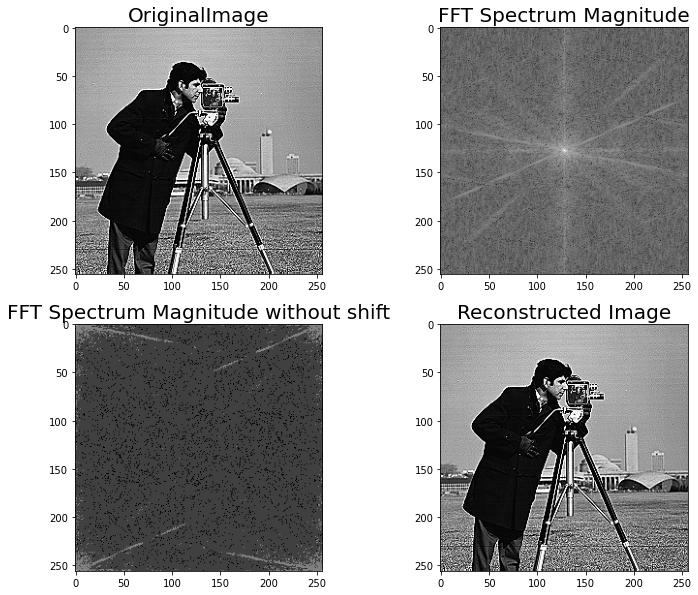

In [4]:
pylab.figure(figsize=(12,10))
freq1 =fp.fft2(im5)
im5_=fp.ifft2(freq1).real
pylab.subplot(2,2,1), pylab.imshow(im5, cmap='gray'), pylab.title('OriginalImage', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 +
np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(2,2,3), pylab.imshow(20*np.log10( 0.1 +
freq1).astype(int), cmap='gray')
pylab.title('FFT Spectrum Magnitude without shift', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im5_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

In [5]:
from PIL import Image
im5 = np.array(Image.open("image5.jpg").convert('L'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


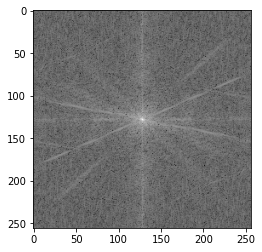

(<matplotlib.image.AxesImage at 0x7fb9b0c4b790>, None)

In [6]:
freq = fp.fft2(im5)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fp.fftshift(freq1)
pylab.imshow( (20*np.log10( 0.1 +
freq2)).astype(int),cmap='gray'), pylab.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


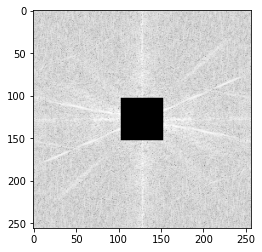

In [7]:
freq2[half_w-25:half_w+25,half_h-25:half_h+25] = 0
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int),cmap='gray')
pylab.show()

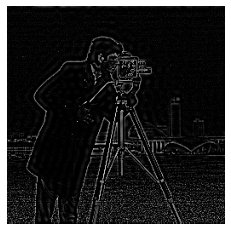

(<matplotlib.image.AxesImage at 0x7fb9b0c3f6d0>,
 (-0.5, 255.5, 255.5, -0.5),
 None)

In [8]:
im5_ = np.clip(fp.ifft2(fftpack.ifftshift(freq2)).real,0,255)
pylab.imshow(im5_, cmap='gray'), pylab.axis('off'), pylab.show()

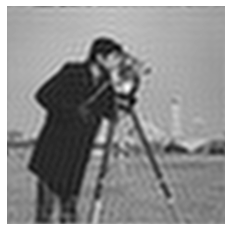

In [9]:
freq1 = np.copy(freq)
freq2 = fftpack.fftshift(freq1)
freq2_low = np.copy(freq2)
freq2_low[half_w-25:half_w+25,half_h-25:half_h+25] = 0 
freq2 -= freq2_low 
im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


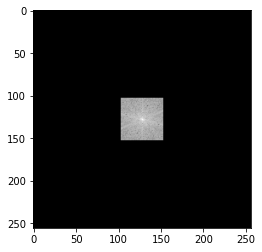

In [10]:
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int),cmap='gray')
pylab.show()

(150, 150)


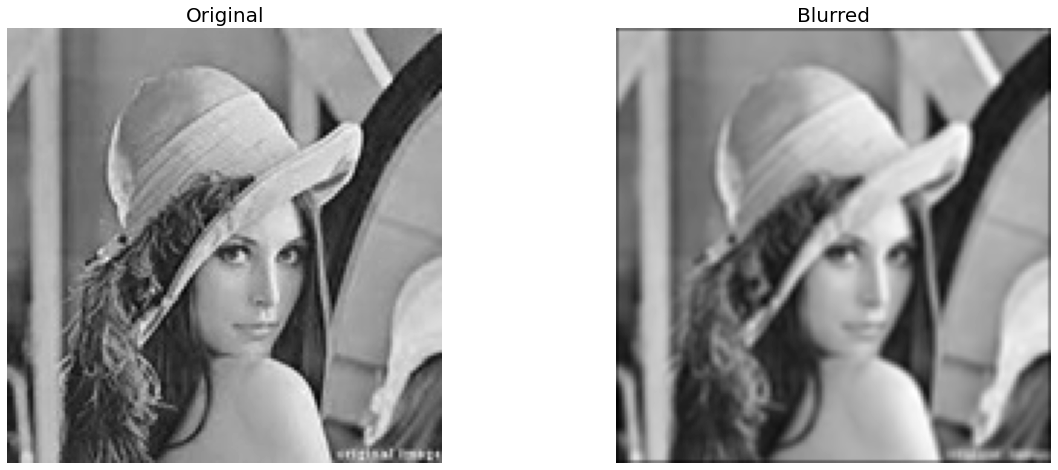

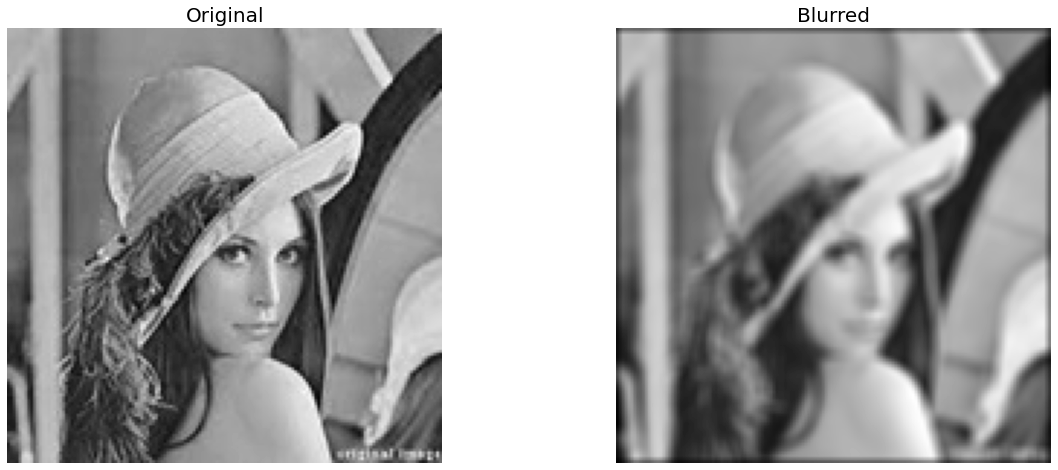

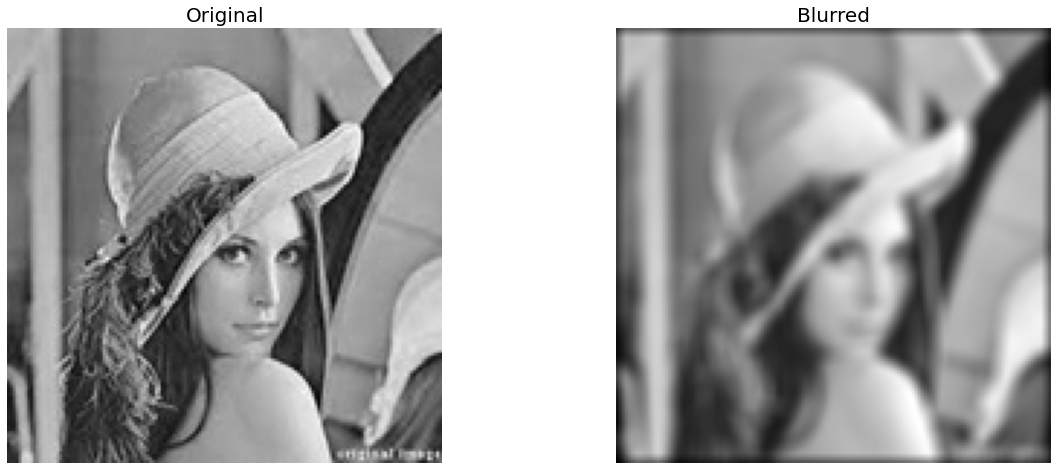

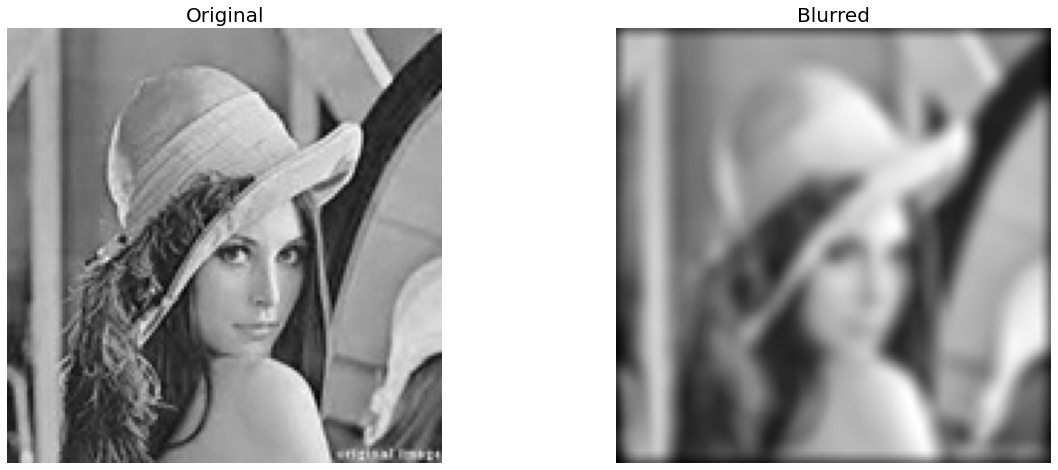

In [12]:
from scipy import signal
im6 = np.mean(imread('image6.jpg'), axis=2)
print(im6.shape)

for i in (3,5,7,9):
    gauss_kernel = np.outer(signal.gaussian(i, 3), signal.gaussian(i, 3)) #2D Gaussian kernel of size i with σ = 3
    im_blurred = signal.fftconvolve(im6, gauss_kernel, mode='same')
    fig, (ax_original, ax_blurred) = pylab.subplots(1, 2,figsize=(20,8))
    ax_original.imshow(im6, cmap='gray')
    ax_original.set_title('Original', size=20)
    ax_original.set_axis_off()
    ax_blurred.imshow(im_blurred, cmap='gray')
    ax_blurred.set_title('Blurred', size=20)
    ax_blurred.set_axis_off()
    fig.show()